In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Traffic Light Segmentation

### Load image



In [2]:
img_red = cv2.imread("./red_stop.jpg")
img_green = cv2.imread("./green_go.jpg")
img_yellow = cv2.imread("./yellow_wait.jpg")

# convert to rgb
red_rgb = cv2.cvtColor(img_red,cv2.COLOR_BGR2RGBA)
green_rgb = cv2.cvtColor(img_green,cv2.COLOR_BGR2RGBA)
yellow_rgb = cv2.cvtColor(img_yellow,cv2.COLOR_BGR2RGBA)


# convert to hsv
red_hsv = cv2.cvtColor(img_red,cv2.COLOR_BGR2HSV)
green_hsv = cv2.cvtColor(img_green,cv2.COLOR_BGR2HSV)
yellow_hsv = cv2.cvtColor(img_yellow,cv2.COLOR_BGR2HSV_FULL)


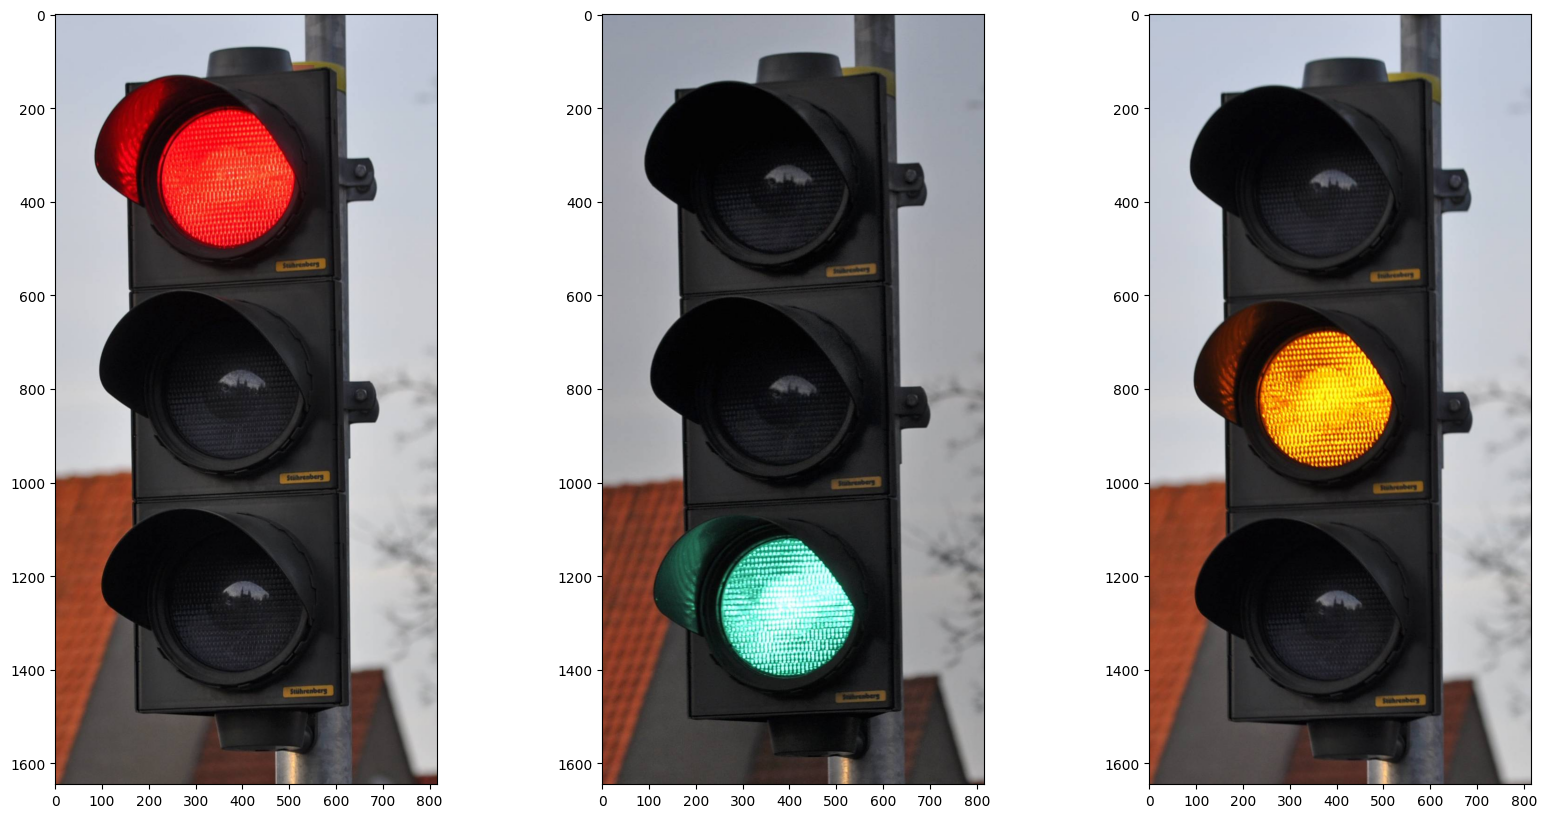

In [3]:
fig, ax = plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(red_rgb)
ax[1].imshow(green_rgb)
ax[2].imshow(yellow_rgb)
plt.show()

#### Define a function convert HSV to 255 scale

In [19]:
def hsv2scale(h,s,v):
    
    h = int(h // 2)
    s = int((s * 255) // 100)
    v = int((v * 255) // 100)
    
    return (h, s, v)

In [29]:
# Traffic light green
h_green, s_green, v_green = hsv2scale(163, 58, 87)

# Traffic light yellow
h_yellow, s_yellow, v_yellow = hsv2scale(44, 100, 97)

# Traffic light red
h_red, s_red, v_red = hsv2scale(2, 85, 92)

# Lower boundry for green
lower_green = np.array([h_green-10,s_green-100,v_green-100])

# Upper boundry for green
upper_green = np.array([h_green+10,s_green+100,v_green+100])

# Lower boundry for yellow
lower_yellow = np.array([h_yellow-10,s_yellow-100,v_yellow-100])

# Upper boundry for yellow
upper_yellow = np.array([h_yellow+10,s_yellow+100,v_yellow+100])

# Lower boundry for red
lower_red = np.array([h_red-10,s_red-100,v_red-100])

# Upper boundry for red
upper_red = np.array([h_red+10,s_red+100,v_red+100])

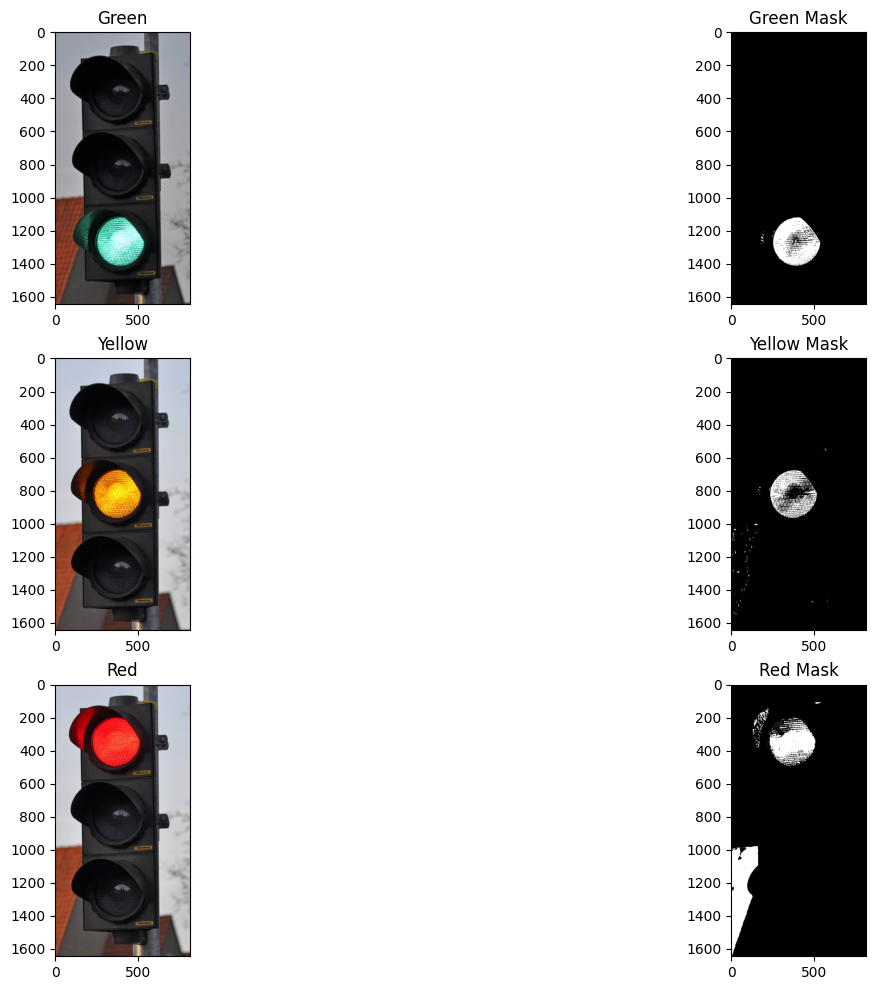

In [21]:
# Get mask for green
mask_green = cv2.inRange(green_hsv,lower_green,upper_green)

# Get mask for yellow
mask_yellow = cv2.inRange(yellow_hsv,lower_yellow,upper_yellow)

# Get mask for red
mask_red = cv2.inRange(red_hsv,lower_red,upper_red)

# Visualize the mask with the image
fig, ax = plt.subplots(3,2,figsize=(16,12))
ax[0,0].set_title("Green")
ax[0,0].imshow(green_rgb)
ax[0,1].set_title("Green Mask")
ax[0,1].imshow(mask_green,cmap='gray')
ax[1,0].set_title("Yellow")
ax[1,0].imshow(yellow_rgb)
ax[1,1].set_title("Yellow Mask")
ax[1,1].imshow(mask_yellow,cmap='gray')
ax[2,0].set_title("Red")
ax[2,0].imshow(red_rgb)
ax[2,1].set_title("Red Mask")
ax[2,1].imshow(mask_red,cmap='gray')
plt.show()

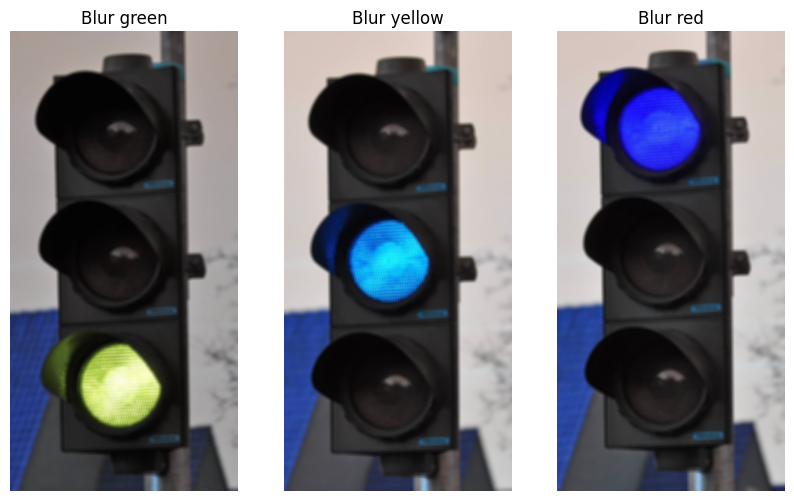

In [22]:
# Apply blur filter
blur_green = cv2.blur(img_green, (15, 15))
blur_yellow = cv2.blur(img_yellow, (15, 15))
blur_red = cv2.blur(img_red, (15, 15))

# Display images
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
ax[0].imshow(blur_green)
ax[0].set_title("Blur green")
ax[0].axis('off')  # Optional: Turn off axis
plt.savefig("blur_green.png")  # Save figure

ax[1].imshow(blur_yellow)
ax[1].set_title("Blur yellow")
ax[1].axis('off')  # Optional: Turn off axis
plt.savefig("blur_yellow.png")  # Save figure

ax[2].imshow(blur_red)
ax[2].set_title("Blur red")
ax[2].axis('off')  # Optional: Turn off axis
plt.savefig("blur_red.png")  # Save figure

plt.show()

In [30]:
# Convert to HSV
blur_hsv = cv2.cvtColor(blur_green,cv2.COLOR_BGR2HSV)

# Get mask for green
blur_mask_green = cv2.inRange(blur_hsv,lower_green,upper_green)

# Convert to HSV
blur_hsv_yellow = cv2.cvtColor(blur_yellow,cv2.COLOR_BGR2HSV)

# Get mask for green
blur_mask_yellow = cv2.inRange(blur_hsv_yellow,lower_yellow,upper_yellow)

# Convert to HSV
blur_hsv_red = cv2.cvtColor(blur_red,cv2.COLOR_BGR2HSV)

# Get mask for green
blur_mask_red = cv2.inRange(blur_hsv_red,lower_red,upper_red)

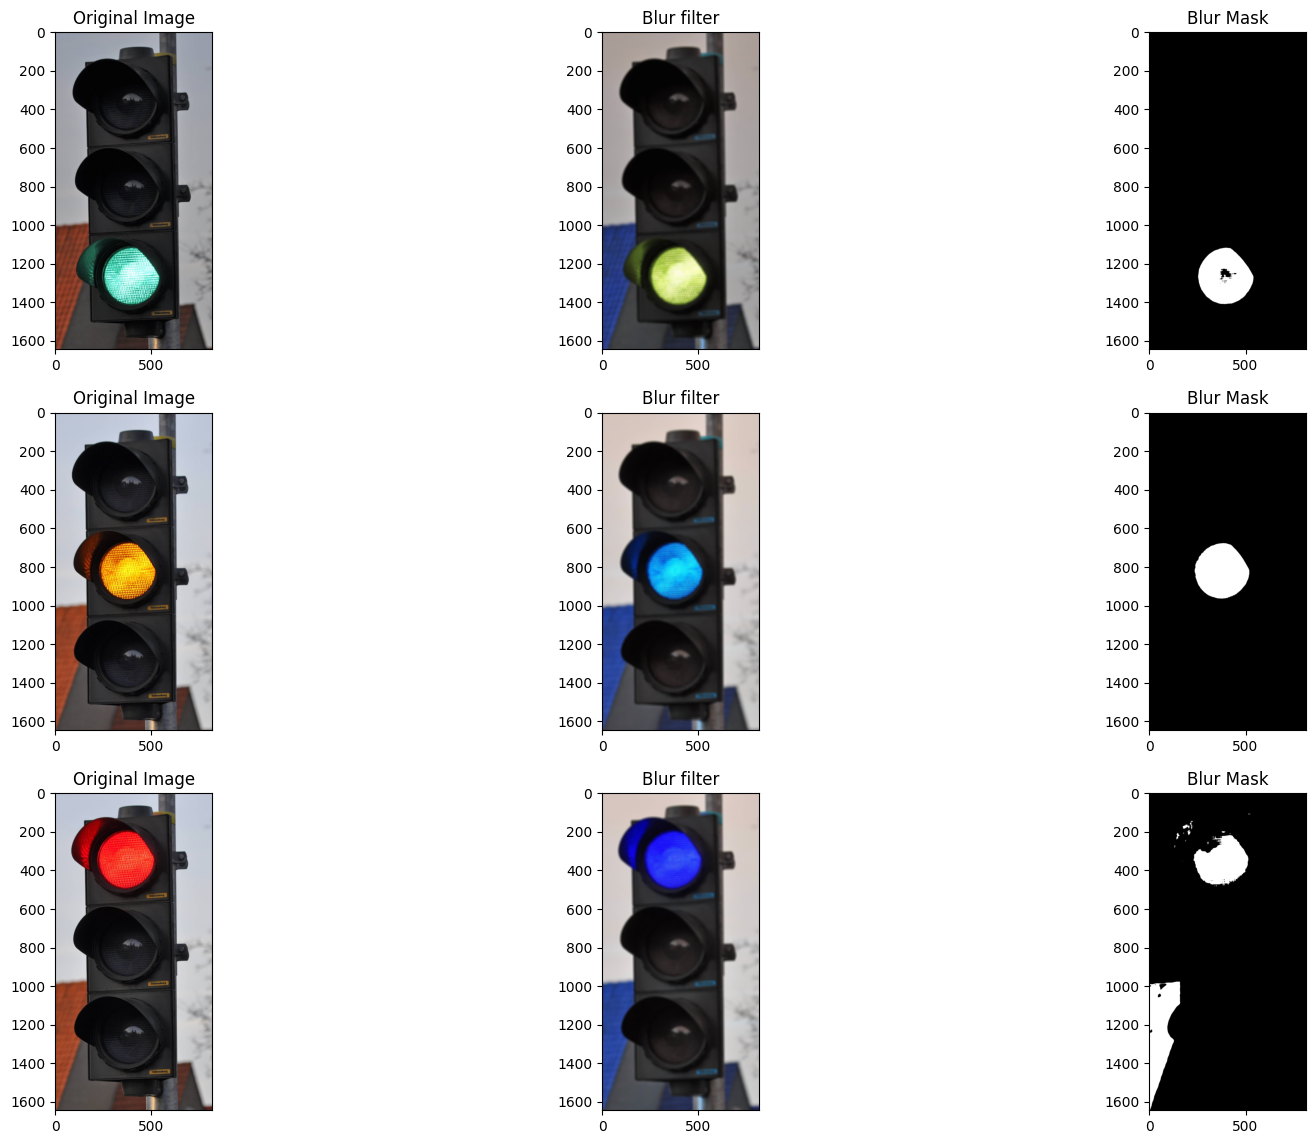

In [33]:
# Visualize the mask with the image
fig, ax = plt.subplots(3,3,figsize=(20,14))
ax[0,0].set_title("Original Image")
ax[0,0].imshow(green_rgb)
ax[0,1].set_title("Blur filter")
ax[0,1].imshow(blur_green)
ax[0,2].set_title("Blur Mask")
ax[0,2].imshow(blur_mask_green,cmap='gray')

ax[1,0].set_title("Original Image")
ax[1,0].imshow(yellow_rgb)
ax[1,1].set_title("Blur filter")
ax[1,1].imshow(blur_yellow)
ax[1,2].set_title("Blur Mask")
ax[1,2].imshow(blur_mask_yellow,cmap='gray')

ax[2,0].set_title("Original Image")
ax[2,0].imshow(red_rgb)
ax[2,1].set_title("Blur filter")
ax[2,1].imshow(blur_red)
ax[2,2].set_title("Blur Mask")
ax[2,2].imshow(blur_mask_red,cmap='gray')

plt.show()

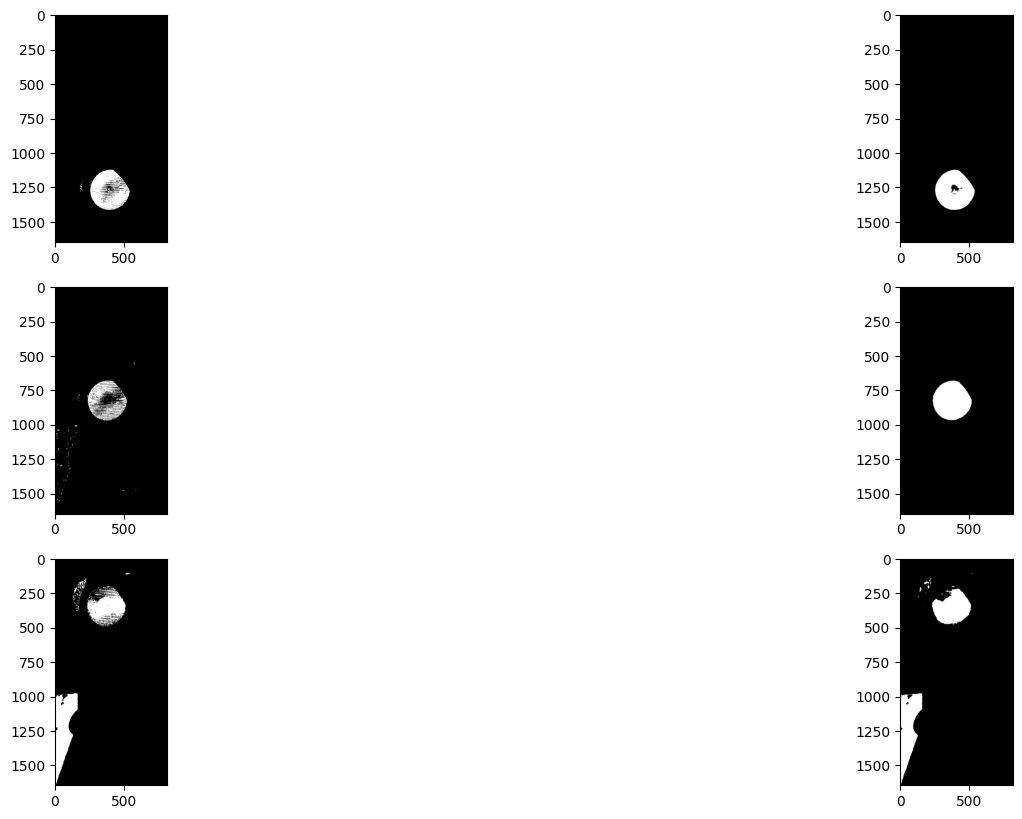

In [34]:
# Visualizetion the mask with blur filter and without blur filter
fig, ax = plt.subplots(3,2,figsize=(20,10))
ax[0,0].imshow(mask_green,cmap='gray')
ax[0,1].imshow(blur_mask_green,cmap='gray')

ax[1,0].imshow(mask_yellow,cmap='gray')
ax[1,1].imshow(blur_mask_yellow,cmap='gray')

ax[2,0].imshow(mask_red,cmap='gray')
ax[2,1].imshow(blur_mask_red,cmap='gray')

plt.show()